### import modules
1. setup matplot.rcParams to export vectorized plots
2. dxchange is for loading and saving .diff files

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib
%matplotlib inline
matplotlib.rcParams['pdf.fonttype'] = 'truetype'
fontProperties = {'family': 'serif', 'serif': ['Helvetica'], 'weight': 'normal', 'size': 12}
plt.rc('font', **fontProperties)
from mpl_toolkits.axes_grid1 import make_axes_locatable
import dxchange

In [5]:
E_min = 0
E_max = 20 #keV
E_step = 0.01
E_num = int((E_max-E_min)/E_step)

E_channel = np.linspace(E_step, E_max, E_num) 
print(len(E_channel))
print(E_channel)

2000
[1.000e-02 2.000e-02 3.000e-02 ... 1.998e+01 1.999e+01 2.000e+01]


In [6]:
## Create model of K and C map
image_size = 20
K_map = np.zeros((image_size, image_size))

K_bg = 0.6
K_dist = 0.0

K_map.fill(K_bg)

## upper-left rectangle
K_map[2:8, 2:8] = K_dist

## upper-right circle
K_map[1, 14] = K_dist
K_map[2, 12:17] = K_dist
K_map[3:5, 11:18] = K_dist
K_map[5, 11:19] = K_dist
K_map[6, 11:18] = K_dist
K_map[7, 12:18] = K_dist
K_map[8, 13:17] = K_dist

## lower-right rectangle
K_map[11:19, 11:18] = K_dist

## lower-left 
K_map[11, 3:5] = K_dist
K_map[11, 6] = K_dist
K_map[12, 2:4] = K_dist
K_map[12, 7] = K_dist
K_map[13, 2] = K_dist
K_map[13, 8] = K_dist
K_map[14, 1] = K_dist
K_map[15, 8] = K_dist
K_map[16, 2] = K_dist
K_map[16, 7:9] = K_dist
K_map[17, 3] = K_dist
K_map[17, 6:8] = K_dist
K_map[18, 5] = K_dist

C_map = K_map

dxchange.write_tiff(K_map, "K_map", dtype='float32', overwrite=True)
dxchange.write_tiff(C_map, "C_map", dtype='float32', overwrite=True)

Text(0.5, 1.0, 'intensity')

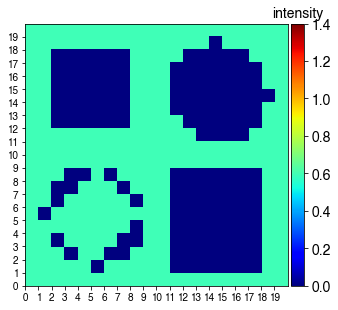

In [7]:
## Plot model
fig1 = plt.figure(figsize=(5,5))
gs1 = gridspec.GridSpec(nrows=1, ncols=1, width_ratios=[1])
fig1_ax1 = fig1.add_subplot(gs1[0,0])
fig1_ax1.set_xticks(np.arange(0, image_size, 1))
fig1_ax1.set_yticks(np.arange(0, image_size, 1))
# fig1_ax1.grid(color='w', linewidth=2)
pos = fig1_ax1.imshow(K_map, cmap='jet', vmin=0, vmax=1.4, extent=[0, 20, 0, 20], origin='upper')
divider = make_axes_locatable(fig1_ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
ticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
cbar = fig1.colorbar(pos, cax=cax, ticks=ticks)
cbar.ax.tick_params(labelsize=14) 
cbar.ax.set_title('intensity', size='14')

In [8]:
## Create model of Ga and O map
image_size = 20
Ga_map = np.zeros((image_size, image_size))

Ga_bg = 1.20
Ga_dist = 1.10

Ga_map.fill(Ga_bg)

## upper-left rectangle
Ga_map[2:8, 2:8] = Ga_dist

## upper-right circle
Ga_map[1, 14] = Ga_dist
Ga_map[2, 12:17] = Ga_dist
Ga_map[3:5, 11:18] = Ga_dist
Ga_map[5, 11:19] = Ga_dist
Ga_map[6, 11:18] = Ga_dist
Ga_map[7, 12:18] = Ga_dist
Ga_map[8, 13:17] = Ga_dist

## lower-right rectangle
Ga_map[11:19, 11:18] = Ga_dist

## lower-left 
Ga_map[11, 3:5] = Ga_dist
Ga_map[11, 6] = Ga_dist
Ga_map[12, 2:4] = Ga_dist
Ga_map[12, 7] = Ga_dist
Ga_map[13, 2] = Ga_dist
Ga_map[13, 8] = Ga_dist
Ga_map[14, 1] = Ga_dist
Ga_map[15, 8] = Ga_dist
Ga_map[16, 2] = Ga_dist
Ga_map[16, 7:9] = Ga_dist
Ga_map[17, 3] = Ga_dist
Ga_map[17, 6:8] = Ga_dist
Ga_map[18, 5] = Ga_dist

O_map = Ga_map

dxchange.write_tiff(Ga_map, "Ga_map", dtype='float32', overwrite=True)
dxchange.write_tiff(O_map, "O_map", dtype='float32', overwrite=True)

Text(0.5, 1.0, 'intensity')

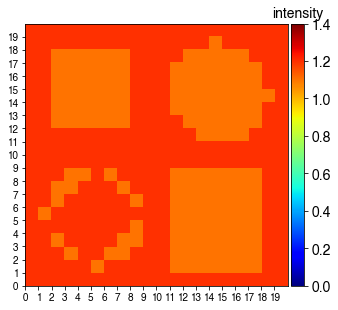

In [9]:
## Plot model
fig2 = plt.figure(figsize=(5,5))
gs2 = gridspec.GridSpec(nrows=1, ncols=1, width_ratios=[1])
fig2_ax1 = fig2.add_subplot(gs2[0,0])
fig2_ax1.set_xticks(np.arange(0, image_size, 1))
fig2_ax1.set_yticks(np.arange(0, image_size, 1))
# fig2_ax1.grid(color='w', linewidth=2)
pos = fig2_ax1.imshow(Ga_map, cmap='jet', vmin=0, vmax=1.4, extent=[0, 20, 0, 20], origin='upper')
divider = make_axes_locatable(fig2_ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
ticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
cbar = fig2.colorbar(pos, cax=cax, ticks=ticks)
cbar.ax.tick_params(labelsize=14) 
cbar.ax.set_title('intensity', size='14')

In [10]:
## Create model of Fe and Si map
image_size = 20
Fe_map = np.zeros((image_size, image_size))

Fe_bg = 0.10
Fe_dist = 0.25

Fe_map.fill(Fe_bg)

## upper-left rectangle
Fe_map[2:8, 2:8] = Fe_dist

## upper-right circle
Fe_map[1, 14] = Fe_dist
Fe_map[2, 12:17] = Fe_dist
Fe_map[3:5, 11:18] = Fe_dist
Fe_map[5, 11:19] = Fe_dist
Fe_map[6, 11:18] = Fe_dist
Fe_map[7, 12:18] = Fe_dist
Fe_map[8, 13:17] = Fe_dist

## lower-right rectangle
Fe_map[11:19, 11:18] = Fe_dist

## lower-left 
Fe_map[11, 3:5] = Fe_dist
Fe_map[11, 6] = Fe_dist
Fe_map[12, 2:4] = Fe_dist
Fe_map[12, 7] = Fe_dist
Fe_map[13, 2] = Fe_dist
Fe_map[13, 8] = Fe_dist
Fe_map[14, 1] = Fe_dist
Fe_map[15, 8] = Fe_dist
Fe_map[16, 2] = Fe_dist
Fe_map[16, 7:9] = Fe_dist
Fe_map[17, 3] = Fe_dist
Fe_map[17, 6:8] = Fe_dist
Fe_map[18, 5] = Fe_dist

Si_map = Fe_map

dxchange.write_tiff(Si_map, "Si_map", dtype='float32', overwrite=True)
dxchange.write_tiff(Fe_map, "Fe_map", dtype='float32', overwrite=True)

Text(0.5, 1.0, 'intensity')

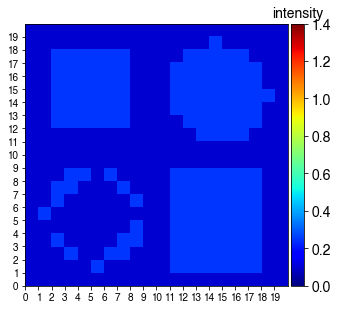

In [11]:
## Plot model
fig3 = plt.figure(figsize=(5,5))
gs3 = gridspec.GridSpec(nrows=1, ncols=1, width_ratios=[1])
fig3_ax1 = fig3.add_subplot(gs3[0,0])
fig3_ax1.set_xticks(np.arange(0, image_size, 1))
fig3_ax1.set_yticks(np.arange(0, image_size, 1))
# fig3_ax1.grid(color='w', linewidth=2)
pos = fig3_ax1.imshow(Fe_map, cmap='jet', vmin=0, vmax=1.4, extent=[0, 20, 0, 20], origin='upper')
divider = make_axes_locatable(fig3_ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
ticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
cbar = fig3.colorbar(pos, cax=cax, ticks=ticks)
cbar.ax.tick_params(labelsize=14) 
cbar.ax.set_title('intensity', size='14')

In [12]:
## Create model of Pd and Ca map
image_size = 20
Pd_map = np.zeros((image_size, image_size))

Pd_bg = 0.00
Pd_dist = 1.38
Pd_dist_2 = 1.10

Pd_map.fill(Pd_bg)

## upper-left rectangle
Pd_map[2:8, 2:8] = Pd_dist
Pd_map[2, 4:7] = Pd_dist_2
Pd_map[3, 3:8] = Pd_dist_2
Pd_map[4, 2:8] = Pd_dist_2
Pd_map[5, 2:8] = Pd_dist_2
Pd_map[6, 2:8] = Pd_dist_2
Pd_map[7, 3:7] = Pd_dist_2

## upper-right circle
Pd_map[1, 14] = Pd_dist
Pd_map[2, 12:17] = Pd_dist
Pd_map[3:5, 11:18] = Pd_dist
Pd_map[5, 11:19] = Pd_dist
Pd_map[6, 11:18] = Pd_dist
Pd_map[7, 12:18] = Pd_dist
Pd_map[8, 13:17] = Pd_dist

## lower-right rectangle
Pd_map[11:19, 11:18] = Pd_dist

## lower-left 
Pd_map[11, 3:5] = Pd_dist
Pd_map[11, 6] = Pd_dist
Pd_map[12, 2:4] = Pd_dist
Pd_map[12, 7] = Pd_dist
Pd_map[13, 2] = Pd_dist
Pd_map[13, 8] = Pd_dist
Pd_map[14, 1] = Pd_dist
Pd_map[15, 8] = Pd_dist
Pd_map[16, 2] = Pd_dist
Pd_map[16, 7:9] = Pd_dist
Pd_map[17, 3] = Pd_dist
Pd_map[17, 6:8] = Pd_dist
Pd_map[18, 5] = Pd_dist

Ca_map = Pd_map

dxchange.write_tiff(Ca_map, "Ca_map", dtype='float32', overwrite=True)
dxchange.write_tiff(Pd_map, "Pd_map", dtype='float32', overwrite=True)

Text(0.5, 1.0, 'intensity')

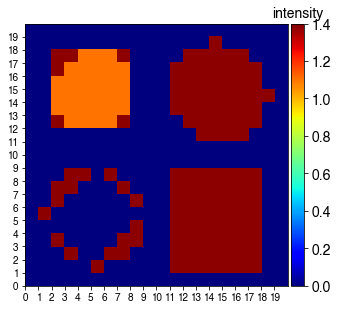

In [13]:
## Plot model
fig4 = plt.figure(figsize=(5,5))
gs4 = gridspec.GridSpec(nrows=1, ncols=1, width_ratios=[1])
fig4_ax1 = fig4.add_subplot(gs4[0,0])
fig4_ax1.set_xticks(np.arange(0, image_size, 1))
fig4_ax1.set_yticks(np.arange(0, image_size, 1))
# fig4_ax1.grid(color='w', linewidth=2)
pos = fig4_ax1.imshow(Pd_map, cmap='jet', vmin=0, vmax=1.4, extent=[0, 20, 0, 20], origin='upper')
divider = make_axes_locatable(fig4_ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
ticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
cbar = fig4.colorbar(pos, cax=cax, ticks=ticks)
cbar.ax.tick_params(labelsize=14) 
cbar.ax.set_title('intensity', size='14')

In [14]:
## Create model of Pd and Ca map
image_size = 20
Sn_map = np.zeros((image_size, image_size))

Sn_bg = 0.00
Sn_dist = 0.60
Sn_dist_2 = 1.10

Sn_map.fill(Sn_bg)

## upper-left rectangle
Sn_map[2:8, 2:8] = Sn_dist
Sn_map[2, 4:7] = Sn_dist_2
Sn_map[3, 3:8] = Sn_dist_2
Sn_map[4, 2:8] = Sn_dist_2
Sn_map[5, 2:8] = Sn_dist_2
Sn_map[6, 2:8] = Sn_dist_2
Sn_map[7, 3:7] = Sn_dist_2

## upper-right circle
Sn_map[1, 14] = Sn_dist
Sn_map[2, 12:17] = Sn_dist
Sn_map[3:5, 11:18] = Sn_dist
Sn_map[5, 11:19] = Sn_dist
Sn_map[6, 11:18] = Sn_dist
Sn_map[7, 12:18] = Sn_dist
Sn_map[8, 13:17] = Sn_dist

## lower-right rectangle
Sn_map[11:19, 11:18] = Sn_dist

## lower-left 
Sn_map[11, 3:5] = Sn_dist
Sn_map[11, 6] = Sn_dist
Sn_map[12, 2:4] = Sn_dist
Sn_map[12, 7] = Sn_dist
Sn_map[13, 2] = Sn_dist
Sn_map[13, 8] = Sn_dist
Sn_map[14, 1] = Sn_dist
Sn_map[15, 8] = Sn_dist
Sn_map[16, 2] = Sn_dist
Sn_map[16, 7:9] = Sn_dist
Sn_map[17, 3] = Sn_dist
Sn_map[17, 6:8] = Sn_dist
Sn_map[18, 5] = Sn_dist

Fe_map_2 = Sn_map

dxchange.write_tiff(Sn_map, "Sn_map", dtype='float32', overwrite=True)
dxchange.write_tiff(Fe_map_2, "Fe_map_2", dtype='float32', overwrite=True)

Text(0.5, 1.0, 'intensity')

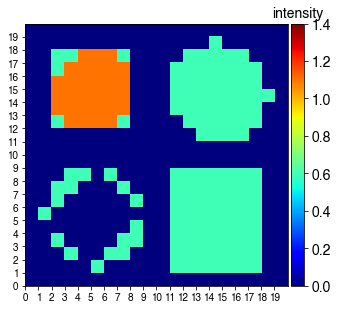

In [15]:
## Plot model
fig5 = plt.figure(figsize=(5,5))
gs5 = gridspec.GridSpec(nrows=1, ncols=1, width_ratios=[1])
fig5_ax1 = fig5.add_subplot(gs5[0,0])
fig5_ax1.set_xticks(np.arange(0, image_size, 1))
fig5_ax1.set_yticks(np.arange(0, image_size, 1))
# fig4_ax1.grid(color='w', linewidth=2)
pos = fig5_ax1.imshow(Sn_map, cmap='jet', vmin=0, vmax=1.4, extent=[0, 20, 0, 20], origin='upper')
divider = make_axes_locatable(fig5_ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
ticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
cbar = fig5.colorbar(pos, cax=cax, ticks=ticks)
cbar.ax.tick_params(labelsize=14) 
cbar.ax.set_title('intensity', size='14')

Text(0.5, 1.0, 'intensity')

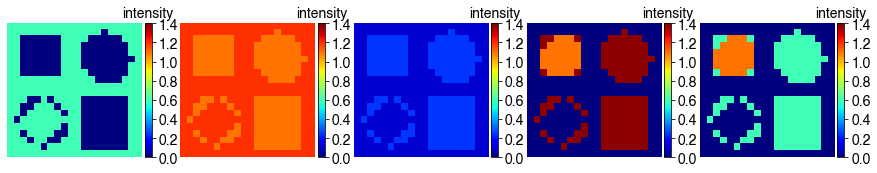

In [16]:
## Plot all 5 models
fig6 = plt.figure(figsize=(15,3))
gs6 = gridspec.GridSpec(nrows=1, ncols=5, width_ratios=[1,1,1,1,1])

fig6_ax1 = fig6.add_subplot(gs6[0,0])
fig6_ax1.set_xticks(np.arange(0, image_size, 1))
fig6_ax1.set_yticks(np.arange(0, image_size, 1))
# fig6_ax1.grid(color='w', linewidth=2)
fig6_ax1.axis('off')
pos = fig6_ax1.imshow(K_map, cmap='jet', vmin=0, vmax=1.4, extent=[0, 20, 0, 20], origin='upper')
divider = make_axes_locatable(fig6_ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
ticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
cbar = fig6.colorbar(pos, cax=cax, ticks=ticks)
cbar.ax.tick_params(labelsize=14) 
cbar.ax.set_title('intensity', size='14')

fig6_ax2 = fig6.add_subplot(gs6[0,1])
fig6_ax2.set_xticks(np.arange(0, image_size, 1))
fig6_ax2.set_yticks(np.arange(0, image_size, 1))
# fig6_ax2.grid(color='w', linewidth=2)
fig6_ax2.axis('off')
pos = fig6_ax2.imshow(Ga_map, cmap='jet', vmin=0, vmax=1.4, extent=[0, 20, 0, 20], origin='upper')
divider = make_axes_locatable(fig6_ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
ticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
cbar = fig6.colorbar(pos, cax=cax, ticks=ticks)
cbar.ax.tick_params(labelsize=14) 
cbar.ax.set_title('intensity', size='14')

fig6_ax3 = fig6.add_subplot(gs6[0,2])
fig6_ax3.set_xticks(np.arange(0, image_size, 1))
fig6_ax3.set_yticks(np.arange(0, image_size, 1))
# fig6_ax3.grid(color='w', linewidth=2)
fig6_ax3.axis('off')
pos = fig6_ax3.imshow(Fe_map, cmap='jet', vmin=0, vmax=1.4, extent=[0, 20, 0, 20], origin='upper')
divider = make_axes_locatable(fig6_ax3)
cax = divider.append_axes("right", size="5%", pad=0.05)
ticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
cbar = fig6.colorbar(pos, cax=cax, ticks=ticks)
cbar.ax.tick_params(labelsize=14) 
cbar.ax.set_title('intensity', size='14')

fig6_ax4 = fig6.add_subplot(gs6[0,3])
fig6_ax4.set_xticks(np.arange(0, image_size, 1))
fig6_ax4.set_yticks(np.arange(0, image_size, 1))
# fig6_ax4.grid(color='w', linewidth=2)
fig6_ax4.axis('off')
pos = fig6_ax4.imshow(Pd_map, cmap='jet', vmin=0, vmax=1.4, extent=[0, 20, 0, 20], origin='upper')
divider = make_axes_locatable(fig6_ax4)
cax = divider.append_axes("right", size="5%", pad=0.05)
ticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
cbar = fig6.colorbar(pos, cax=cax, ticks=ticks)
cbar.ax.tick_params(labelsize=14) 
cbar.ax.set_title('intensity', size='14')

fig6_ax5 = fig6.add_subplot(gs6[0,4])
fig6_ax5.set_xticks(np.arange(0, image_size, 1))
fig6_ax5.set_yticks(np.arange(0, image_size, 1))
# fig6_ax5.grid(color='w', linewidth=2)
fig6_ax5.axis('off')
pos = fig6_ax5.imshow(Sn_map, cmap='jet', vmin=0, vmax=1.4, extent=[0, 20, 0, 20], origin='upper')
divider = make_axes_locatable(fig6_ax5)
cax = divider.append_axes("right", size="5%", pad=0.05)
ticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
cbar = fig6.colorbar(pos, cax=cax, ticks=ticks)
cbar.ax.tick_params(labelsize=14) 
cbar.ax.set_title('intensity', size='14')

In [17]:
from scipy.ndimage import rotate as sp_rotate

Text(0.5, 1.0, 'intensity')

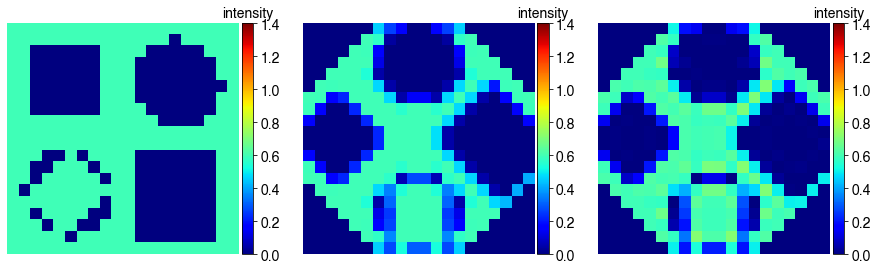

In [21]:
K_map_45_1 = sp_rotate(K_map, 45, reshape=False, order=1)
K_map_45_2 = sp_rotate(K_map, 45, reshape=False, order=2)

fig7 = plt.figure(figsize=(15,5))
gs7 = gridspec.GridSpec(nrows=1, ncols=3, width_ratios=[1,1,1])

fig7_ax1 = fig7.add_subplot(gs7[0,0])
fig7_ax1.axis('off')
pos = fig7_ax1.imshow(K_map, cmap='jet', vmin=0, vmax=1.4, extent=[0, 20, 0, 20], origin='upper')
divider = make_axes_locatable(fig7_ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
ticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
cbar = fig7.colorbar(pos, cax=cax, ticks=ticks)
cbar.ax.tick_params(labelsize=14) 
cbar.ax.set_title('intensity', size='14')

fig7_ax2 = fig7.add_subplot(gs7[0,1])
pos = fig7_ax2.imshow(K_map_45_1, cmap='jet', vmin=0, vmax=1.4, extent=[0, 20, 0, 20], origin='upper')
fig7_ax2.axis('off')
divider = make_axes_locatable(fig7_ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
ticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
cbar = fig7.colorbar(pos, cax=cax, ticks=ticks)
cbar.ax.tick_params(labelsize=14) 
cbar.ax.set_title('intensity', size='14')

fig7_ax3 = fig7.add_subplot(gs7[0,2])
pos = fig7_ax3.imshow(K_map_45_2, cmap='jet', vmin=0, vmax=1.4, extent=[0, 20, 0, 20], origin='upper')
fig7_ax3.axis('off')
divider = make_axes_locatable(fig7_ax3)
cax = divider.append_axes("right", size="5%", pad=0.05)
ticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
cbar = fig7.colorbar(pos, cax=cax, ticks=ticks)
cbar.ax.tick_params(labelsize=14) 
cbar.ax.set_title('intensity', size='14')